In [1]:
import os
try:
    path_initialized
except NameError:
    os.chdir('..')
    path_initialized = True

import networkx as nx

from swiper2.schedule_experiments import *
from swiper2.device_manager import DeviceManager

In [2]:
msd = MSD15To1Schedule()

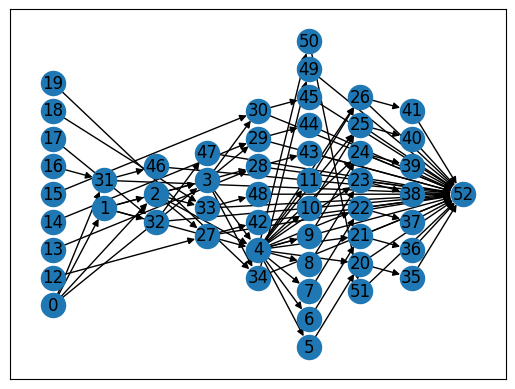

In [3]:
G = msd.schedule.to_dag()

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

nx.draw_networkx(G, pos=pos)

In [4]:
dm = DeviceManager(2, msd.schedule)

In [5]:
list(enumerate(msd.schedule.all_instructions))

[(0,
  Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2), (2, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[])),
 (1,
  Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 4), (0, 5), (2, 0), (2, 1), (2, 3), (2, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[])),
 (2,
  Instruction(name='MERGE', patches=[(0, 0), (0, 2), (0, 4), (0, 6), (2, 0), (2, 2), (2, 3), (2, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[])),
 (3,
  Instruction(name='MERGE', patches=[(0, 0), (0, 3), (0, 5), (0, 6), (2, 1), (2, 2), (2, 3), (2, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[])),
 (4,
  I

In [6]:
while not dm.is_done():
    print(dm.get_next_round({}))

[SyndromeRound(patch=(0, 0), round=0, instruction_idx=0), SyndromeRound(patch=(0, 1), round=0, instruction_idx=0), SyndromeRound(patch=(0, 2), round=0, instruction_idx=0), SyndromeRound(patch=(0, 3), round=0, instruction_idx=0), SyndromeRound(patch=(2, 0), round=0, instruction_idx=0), SyndromeRound(patch=(2, 1), round=0, instruction_idx=0), SyndromeRound(patch=(2, 2), round=0, instruction_idx=0), SyndromeRound(patch=(2, 4), round=0, instruction_idx=0), SyndromeRound(patch=(1, 0), round=0, instruction_idx=0), SyndromeRound(patch=(1, 1), round=0, instruction_idx=0), SyndromeRound(patch=(1, 2), round=0, instruction_idx=0), SyndromeRound(patch=(1, 3), round=0, instruction_idx=0), SyndromeRound(patch=(1, 4), round=0, instruction_idx=0), SyndromeRound(patch=(3, 0), round=0, instruction_idx=12), SyndromeRound(patch=(3, 1), round=0, instruction_idx=13), SyndromeRound(patch=(3, 2), round=0, instruction_idx=14), SyndromeRound(patch=(3, 3), round=0, instruction_idx=15), SyndromeRound(patch=(3, 4)

In [7]:
dm.get_data()

DeviceData(d=2, num_rounds=17, num_instructions=53, syndrome_count_by_round=[21, 21, 16, 16, 18, 18, 22, 21, 27, 26, 14, 12, 19, 15, 7, 7, 7], instruction_count_by_round=[9, 9, 2, 2, 3, 3, 5, 4, 8, 7, 14, 12, 12, 8, 7, 7, 7], generated_syndrome_data=[[SyndromeRound(patch=(0, 0), round=0, instruction_idx=0), SyndromeRound(patch=(0, 1), round=0, instruction_idx=0), SyndromeRound(patch=(0, 2), round=0, instruction_idx=0), SyndromeRound(patch=(0, 3), round=0, instruction_idx=0), SyndromeRound(patch=(2, 0), round=0, instruction_idx=0), SyndromeRound(patch=(2, 1), round=0, instruction_idx=0), SyndromeRound(patch=(2, 2), round=0, instruction_idx=0), SyndromeRound(patch=(2, 4), round=0, instruction_idx=0), SyndromeRound(patch=(1, 0), round=0, instruction_idx=0), SyndromeRound(patch=(1, 1), round=0, instruction_idx=0), SyndromeRound(patch=(1, 2), round=0, instruction_idx=0), SyndromeRound(patch=(1, 3), round=0, instruction_idx=0), SyndromeRound(patch=(1, 4), round=0, instruction_idx=0), Syndrom

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
 
width = 0.8

for round_idx, round_data in enumerate(dm.get_data().generated_syndrome_data):
    for i, syndrome in enumerate(round_data):
        coords = syndrome.patch
        syndrome.
# Create axis
axes = [1, 2, 1]

# Create Data
data = np.ones(axes, dtype=bool)
 
# Control Transparency
alpha = 0.9
 
# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
 
colors[:] = [1, 0, 0, alpha]  # red

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)
ax.set_aspect('equal')
plt.show()

In [ ]:
regularT = RegularTSchedule(3, 10)

In [ ]:
G = regularT.schedule.to_dag()

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

nx.draw_networkx(G, pos=pos)

In [ ]:
regularT.schedule.all_instructions

In [ ]:
{1, 2, 3, 4, 5} - {3, 5}